# Problemas de Regressão (Atividade para sala)

- Fonte: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [1]:
# bibliotecas

## Estrutura de dados e EDA
import pandas as pd

## EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# [Pergunta de negócio]
# Qual o preço de cada casa?

# [Objetivo]
# Saber quando investir em um determinado imóvel.

# [Tipo do problema]
# Regressão supervisionada

# [Extração de dados]
# Censo

# [Armazenamento de dados]
# Arquivo .csv

# [Carregamento de dados]
df_train = pd.read_csv('../datasets/housing_prices/train.csv')
df_test = pd.read_csv('../datasets/housing_prices/test.csv')

In [3]:
# [EDA]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# [EDA]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

- Temos diversas colunas com dados faltantes, tanto no teste, quanto no treino
- Temos várias colunas categóricas, tanto no teste, quanto no treino
- São 81 colunas no treino e 80 colunas no teste
- A variável de interesse é SalePrice

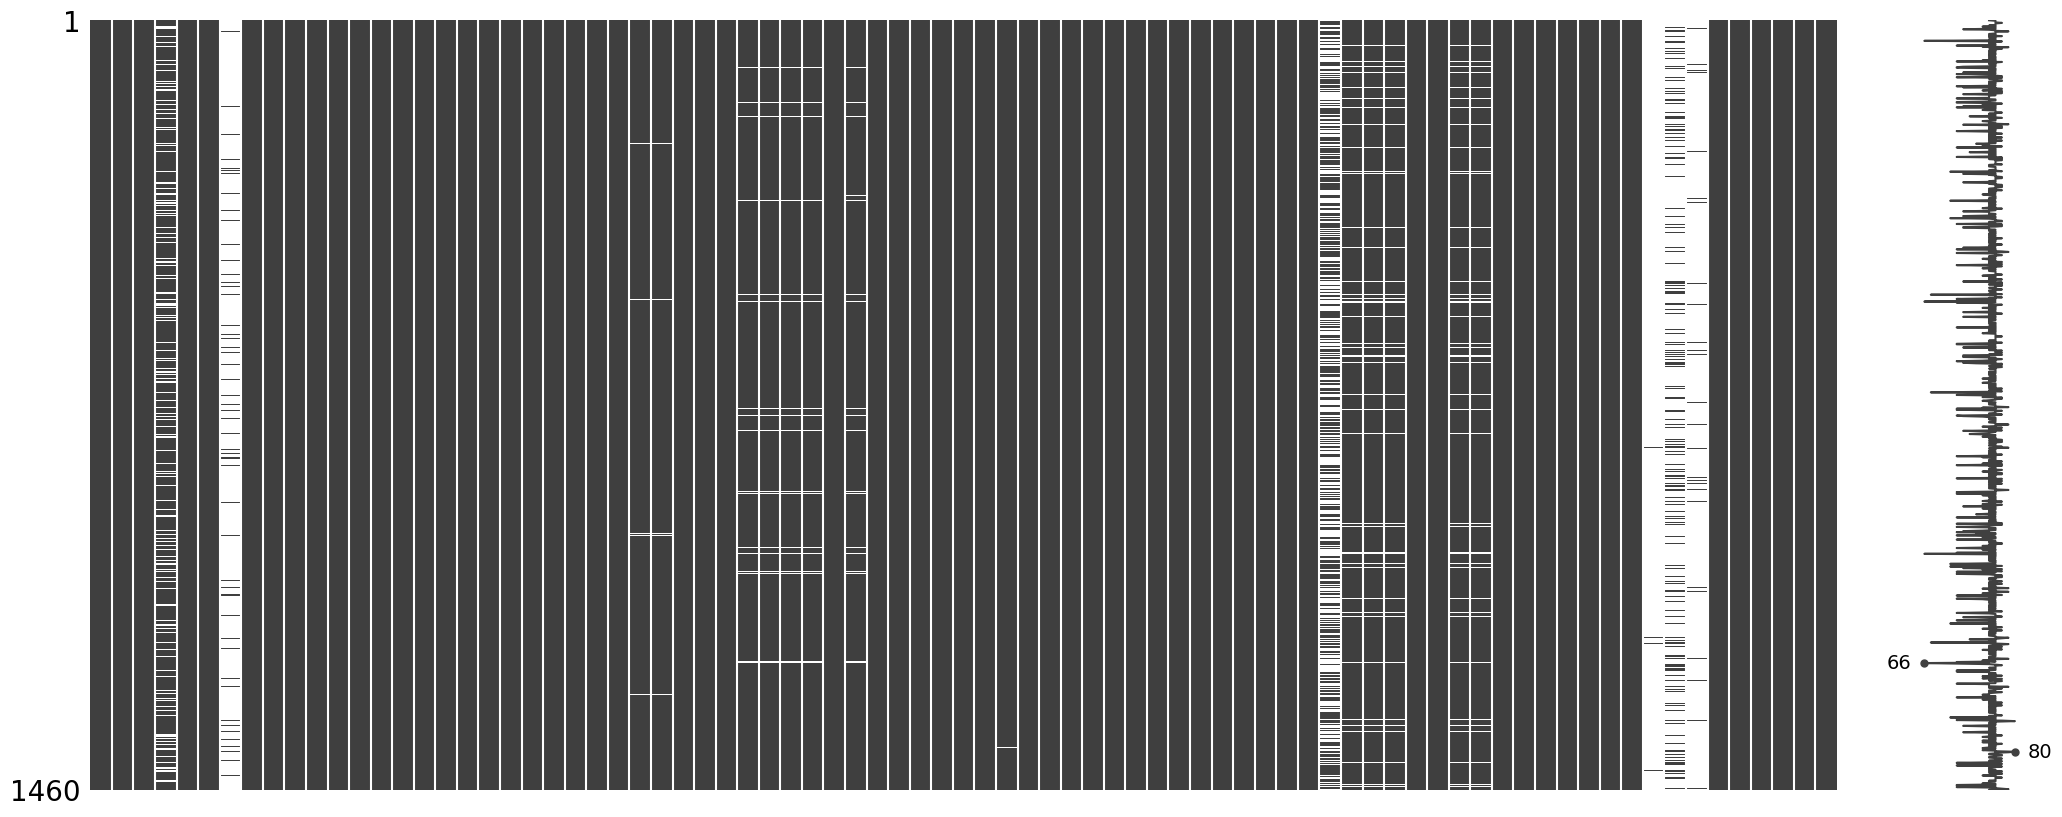

In [5]:
# [EDA]
# Se não instalada
#!pip install missingno

import missingno as mi

mi.matrix(df_train)
plt.show()

- Temos colunas com grande proporção de dados faltantes, por exemplo, a 7ª Alley

In [6]:
# [EDA]
# Vejamos quais colunas faltam dados
dict_null_cols_check = df_train.isnull().any().to_dict()
for col in dict_null_cols_check.keys():
    if dict_null_cols_check[col]:
        print(col)

LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


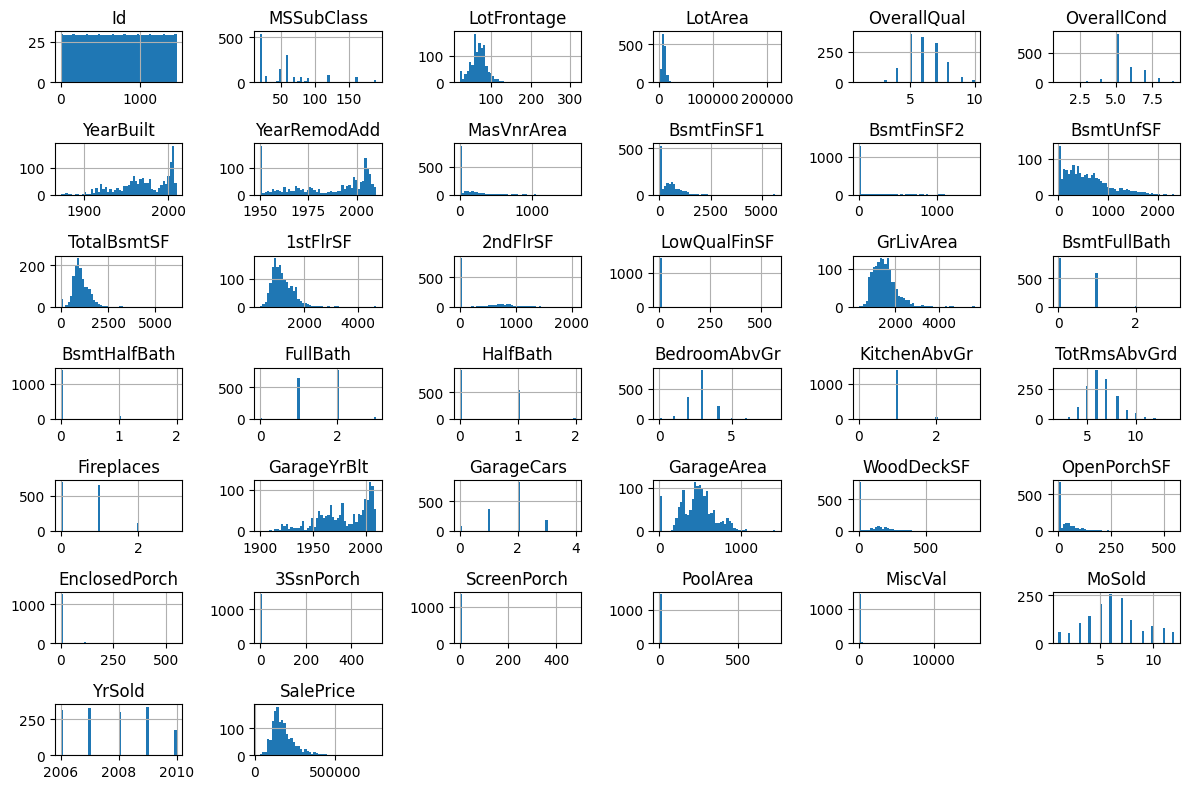

In [7]:
# [EDA]
df_train.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

- Várias variáveis possuem distribuições assimétricas;
- Algumas variáveis, como ano de venda (YrSold), devido aos poucos valores que podem assumir, podem ser tratadas como categóricas;
- Id é único e pode ser descartado;
- ScreenPorch, PoolArea, MiscVal, entre outras são muito desbalanceadas

In [8]:
# [EDA]
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

- O material de construção e acabamento (OverallQual) é a variável mais linearmente correlacionada com a variável de interesse

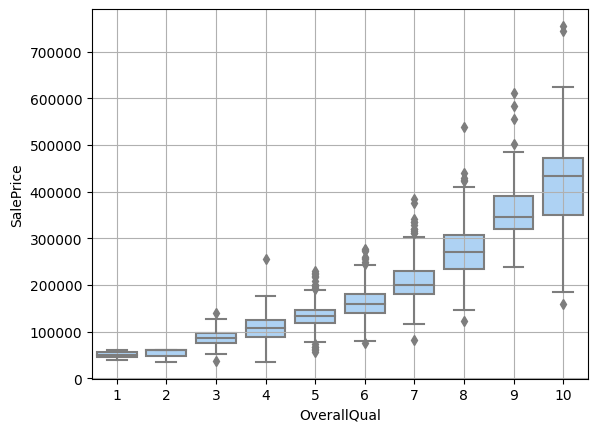

In [9]:
# [EDA]
sns.boxplot(data=df_train, x="OverallQual", y="SalePrice", color="#a2d2ff")
plt.grid('on')
plt.show()

- A informação anterior pode ser confirmada pelo gráfico acima

## Exercício

Consiga um score público menor ou igual a 0.135.

<b>Dica:</b> Dessa vez, cada coluna da tabela merece uma atenção especial, faça o preprocessamento de cada uma separadamente seguindo as etapas da aula anterior.